In [1]:
import pandas as pd

In [2]:
pd.read_csv("titanic.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
%matplotlib inline
titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 432x288 with 0 Axes>

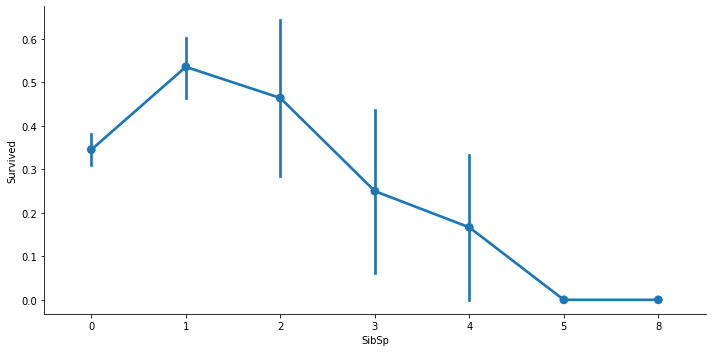

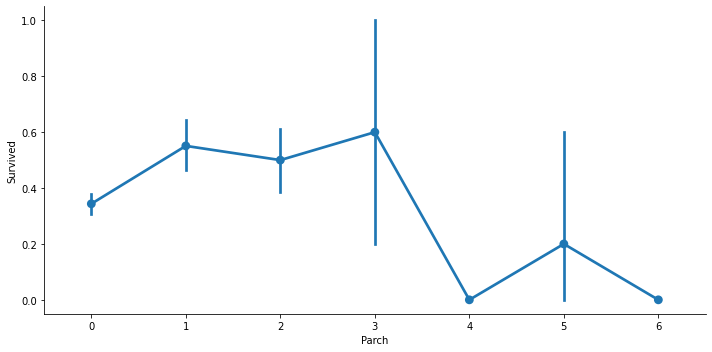

In [7]:
for i,col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2)

In [8]:
titanic['familycnt']=titanic['SibSp']+titanic['Parch']

In [9]:
titanic.drop(['PassengerId','Parch','SibSp'],axis=1,inplace=True)

In [10]:
titanic.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin        687
Embarked       2
familycnt      0
dtype: int64

In [11]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [12]:
titanic['Cabinid']=np.where(titanic['Cabin'].isnull(),0,1)

In [13]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,familycnt,Cabinid
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [14]:
gender_num={'male':0,'female':1}

In [15]:
titanic['Sex']=titanic['Sex'].map(gender_num)

In [16]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,familycnt,Cabinid
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [17]:
titanic.drop(['Name','Ticket','Embarked','Cabin'],axis=1,inplace=True)

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,familycnt,Cabinid
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [19]:
titanic.to_csv('titanic_cleaned.csv',index=False)

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
titanic=pd.read_csv("titanic_cleaned.csv")

In [22]:
features=titanic.drop('Survived',axis=1)
labels=titanic['Survived']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.4,random_state=42)

In [31]:
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [32]:
for dataset in [y_train,y_test,y_val]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


In [33]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [34]:
dir(LogisticRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

C hyperparameter: regularisation parameter that controls how closely the target variable fits to the training data.
Reduce overfitting.

In [35]:
import joblib
import pandas as pd 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [36]:
titanic=pd.read_csv("titanic_cleaned.csv")
titanic.head()

,Survived,Pclass,Sex,Age,Fare,familycnt,Cabinid
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [37]:
tr_features=titanic.drop('Survived',axis=1)
tr_labels=titanic['Survived']
tr_features.to_csv('tr_features.csv',index=False)
tr_labels.to_csv('tr_labels.csv',index=False)

In [38]:
tr_labels=pd.read_csv('tr_labels.csv')

In [39]:
tr

NameError: name 'tr' is not defined

In [40]:
def print_results(results):
    print('BEST PARAMS :{}\n'.format(results.best_params_))
    
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    
    for mean, std,params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3),params))
    

In [52]:
lr=LogisticRegression()
parameters={'C':[0.01,0.001,0.02,10,100,1000]
           }
cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(tr_features,tr_labels.values.ravel())
print_results(cv)

BEST PARAMS :{'C': 10}

0.737 (+/-0.065) for {'C': 0.01}
0.68 (+/-0.077) for {'C': 0.001}
0.77 (+/-0.06) for {'C': 0.02}
0.799 (+/-0.025) for {'C': 10}
0.799 (+/-0.025) for {'C': 100}
0.799 (+/-0.025) for {'C': 1000}


C:\Users\dimbl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
cv.best_estimator_

LogisticRegression(C=10)

In [55]:
joblib.dump(cv.best_estimator_,'LR_model.pkl')

['LR_model.pkl']